<h1>Based upon data of employees of a bank we calculate whether a employee stands a chance to stay in the company or not</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = df.drop(['RowNumber','CustomerId'], axis = 1)

In [14]:
print(df.shape)
print(df.info())

(10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None


In [56]:
df[['Age', 'EstimatedSalary']].agg(['skew', 'kurtosis','mean','median']).transpose()

,skew,kurtosis,mean,median
Age,1.011320,1.395347,38.921800,37.000
EstimatedSalary,0.002085,-1.181518,100090.239881,100193.915


1. The skewness of both age and estimated salary are approxmately 1 and 0, this indicates that the features are right skewed. The kurtosis of both the features indicates that they are much less susceptible to outliers.
2. There are not many outliers in the dataset hence the the mean and median are almost if not same.

<AxesSubplot:xlabel='Gender', ylabel='count'>

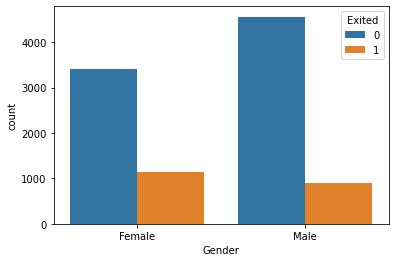

In [19]:
sns.countplot(x='Gender', hue='Exited', data=df)

Females are more likely to be exited than the males

<AxesSubplot:xlabel='Geography', ylabel='count'>

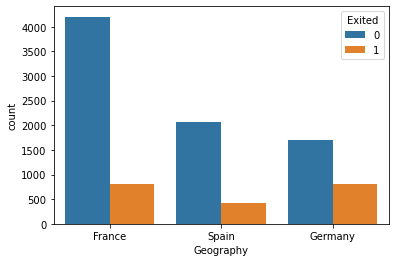

In [48]:
sns.countplot(x='Geography', hue='Exited', data=df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

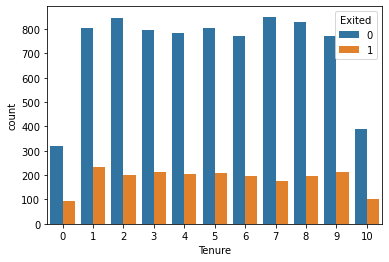

In [59]:
sns.countplot(x='Tenure', hue='Exited', data=df)

1.Customers are likely to stay if he/she has a 0 experience.
2.Customers are most likely to stay is he/she has an experience of more than 10. This might be due to the fact that the customer is old enough to move or he/she is not able to move from the comfort zone.

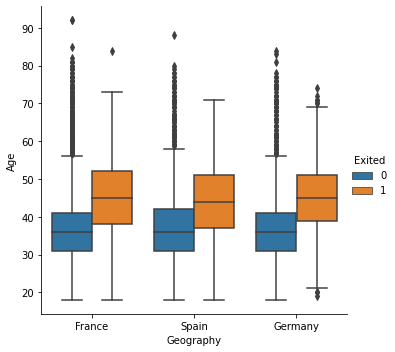

In [50]:
sns.catplot(x = 'Geography', y = 'Age', hue = 'Exited', data = df, kind = 'box')

1.0113202630234552

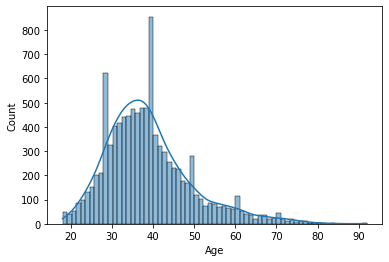

In [24]:
sns.histplot(df['Age'], kde = True)
df['Age'].skew()

Age column is not highly skewed and most of the employees are in the range of 30 to 50

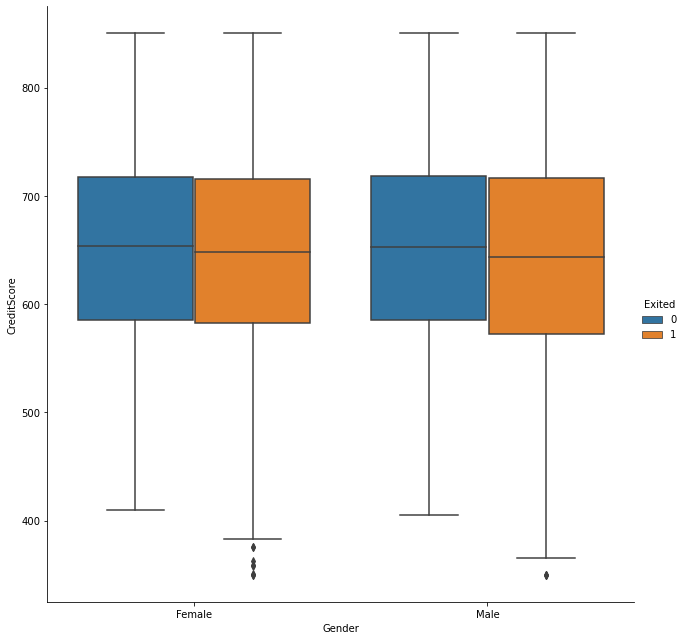

In [28]:
sns.catplot(x='Gender',y='CreditScore',hue='Exited',data=df,height=9, kind="box")

customers who are likely to be exited have credit score less than the median credit score of the customers who would not be exited irrespective of the gender

In [40]:
df.groupby("HasCrCard")[['CreditScore','Balance']].mean()

,CreditScore,Balance
HasCrCard,,
0,651.345331,77920.787552
1,650.187952,75886.913330


Since credit score is dependent on the credit card the mean credit score the customers with and without credit card are almost similar and the mean balance follows the similar trend

<AxesSubplot:>

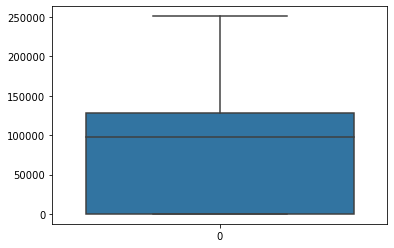

In [45]:
sns.boxplot(data = df['Balance'])

In [46]:
df.groupby('Exited')[['CreditScore','Balance']].median()

,CreditScore,Balance
Exited,,
0,653.0,92072.68
1,646.0,109349.29


The customers with a median balance greather than $109,394 are likely to be exited than the customers whose median balance is below 110K dollars.

In [47]:
df.groupby('Gender')[['CreditScore','Balance']].median()

,CreditScore,Balance
Gender,,
Female,652.0,96147.55
Male,651.0,98064.97


Median bank balance of both males and females are pretty similar to each other.

In [54]:
df.groupby('Geography')[['CreditScore','Balance']].mean()

,CreditScore,Balance
Geography,,
France,649.668329,62092.636516
Germany,651.453567,119730.116134
Spain,651.333872,61818.147763


In [70]:
df.groupby('Geography')[['Tenure','Age','Balance','CreditScore','EstimatedSalary','NumOfProducts']].mean()

,Tenure,Age,Balance,CreditScore,EstimatedSalary,NumOfProducts
Geography,,,,,,
France,5.004587,38.511767,62092.636516,649.668329,99899.180814,1.530913
Germany,5.009964,39.771622,119730.116134,651.453567,101113.435102,1.519729
Spain,5.032297,38.890997,61818.147763,651.333872,99440.572281,1.539362


<h3>Key Take ways from the above EDA</h3>

<b>Goal: Based upon data of employees of a bank we calculate whether a employee stands a chance to stay in the company or not</b>
<br></br>
1.Customers from France are not likely to have chance to stay in the company while customers from germany have a higher chance of staying in the company.
<br></br>
    2.The customers with a median balance greather than $109,394 are likely to be exited than the customers whose median balance is below 110K dollars.
<br></br>
    3.Germany is the top most country in terms of Balance and Estimated Salary this is due to the fact that mean salary of the Gemrnay is higher and also the German customers are likely to stay in the company.
<br></br>
    4.Customers are likely to stay if he/she has a 0 experience.
<br></br>
    5.Customers are most likely to stay is he/she has an experience of more than 10. This might be due to the fact that the customer is old enough to move or he/she is not able to move from the comfort zone.
<br></br>
    6.<b>NumOfProducts</b> attribute shows us that vast majority of clients owns one or two products and clients with more than 3 products do not leave the bank whereas almost 1/3 of clients with only one product left the bank.
<br></br>
    7. <b>Age</b> feature depicts that people who are older tend to exit or dont have a chance to stay in the company when compared to the younger.

<h1>Feature Engineering</h1>

In [93]:
df_num = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(exclude=['int64', 'float64'])

In [80]:
df_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [82]:
df.columns.drop('Surname')

Index(['Geography', 'Gender'], dtype='object')

<AxesSubplot:>

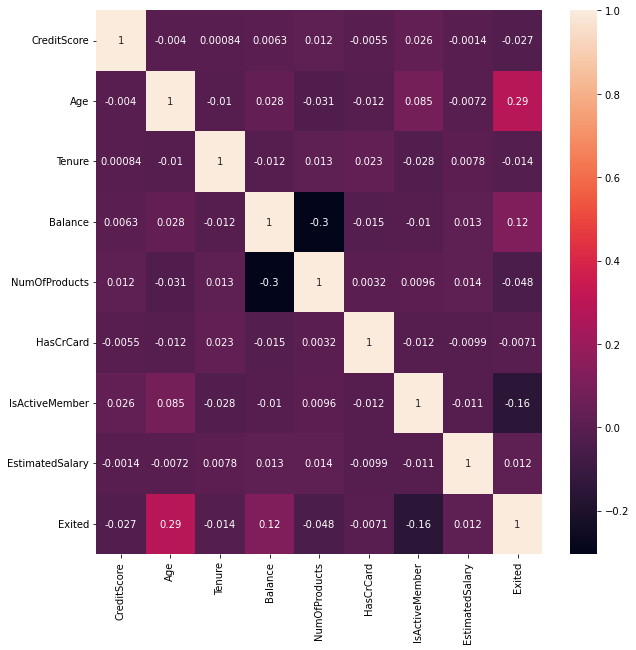

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(), annot=True)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['fea'] = df_num.columns
vif["VIF"] = [variance_inflation_factor(df_num.values, i)
                          for i in range(len(df_num.columns))]
vif

,fea,VIF
0,CreditScore,20.690979
1,Age,13.606988
2,Tenure,3.866685
3,Balance,2.651487
4,NumOfProducts,7.705552
5,HasCrCard,3.286672
6,IsActiveMember,2.150729
7,EstimatedSalary,3.885184
8,Exited,1.435330


In [94]:
df_cat = df_cat.drop(['Surname'], axis = 1)

In [95]:
df_cat = pd.get_dummies(df_cat, drop_first=True)
df_cat

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [97]:
df1 = pd.concat([df_num,df_cat], axis = 1)

In [106]:
y = df1['Exited']

KeyError: 'Exited'

In [105]:
df1 = df1.drop(['Exited'], axis = 1)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [130]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority')
X_train_balanced, y_train_balanced = ros.fit_resample(df1, y) #y_train as balanced target variable
print(X_train_balanced.shape[0] - df1.shape[0], 'new random picked points')

5926 new random picked points


<AxesSubplot:xlabel='Exited', ylabel='count'>

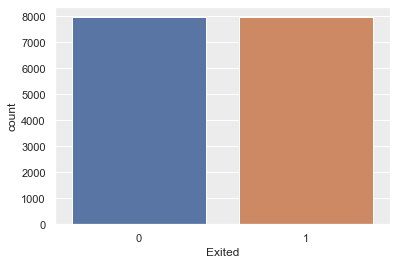

In [135]:
sns.countplot(x=y_train_balanced, data=df1)

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X_train_balanced,y_train_balanced,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

<IPython.core.display.Javascript object>

(11148, 11) (4778, 11) (11148,) (4778,)


In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [232]:
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()
adbc = AdaBoostClassifier()
knn = KNeighborsClassifier()
accuracy_models= []
models = [lg,dt,rfc,adbc,knn]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"Confusion matrix of the model {model}")
    cnf_matrix = confusion_matrix(y_test,y_pred)
    print(cnf_matrix)
    print(classification_report(y_test, y_pred))
    print(f"Accuracy of the model {model}")
    acc = accuracy_score(y_pred,y_test)
    print(acc)
    accuracy_models.append(acc)
    print('\n')

Confusion matrix of the model LogisticRegression()
[[1725  670]
 [ 730 1653]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2395
           1       0.71      0.69      0.70      2383

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778

Accuracy of the model LogisticRegression()
0.7069903725408121


Confusion matrix of the model DecisionTreeClassifier()
[[2007  388]
 [  62 2321]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2395
           1       0.86      0.97      0.91      2383

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778

Accuracy of the model DecisionTreeClassifier()
0.9058183340309753


Confusion matrix of the model RandomForestClassifier()

TP = client exited the company as predicted
FP = client was predicted to exit but stayed instead
TN = client stayed as predicted
FN = client was predicted to stay but exited instead (worst scenario)

FP: Actual is 0 but the predicted calss is 1
FN: Actual is 1 but the predicted class is 0

Precision: Precision tells us how many of the correctly predicted class actually turned out to be positive.

Recall: Recall tells us how many of the actual positive calss we were able to predict correctly with our model.

F1: If we are unsure about what metric to choose then F1 score could be good metic. But remember F1 is the harmonic mean of both precision and recall. But <b>The interpretability of the F1-score is poor. This means that we don’t know what our classifier is maximizing – precision or recall?</b>

Observations:
1.With the above definitions we clearly want to have a high recall and precision score. However this varies from business case to case and in our problem we want to have high recall value.

2.Without HyperParameter tuning RandomForest Classifier is seems to have a good accuracy. However in a classification problem The main metrics are confusion matrix, Precision and Recall.

<h3>Lets fine tune the hyperparameter for both Decision trees and Random Forese classifiers</h3>

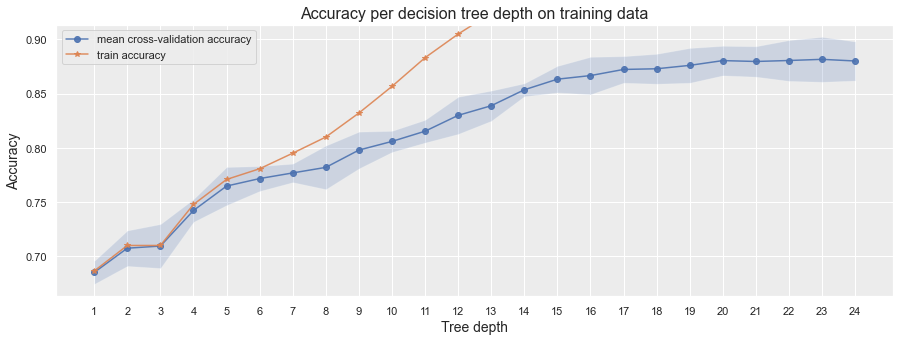

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [171]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-23 tree achieves the best mean cross-validation accuracy 88.1592 +/- 1.03678% on training dataset


In [174]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  23
Accuracy, Training Set:  99.99103 %
Accuracy, Test Set:  90.49812 %
0.9049811636668061
[[2003  392]
 [  62 2321]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      2395
           1       0.86      0.97      0.91      2383

    accuracy                           0.90      4778
   macro avg       0.91      0.91      0.90      4778
weighted avg       0.91      0.90      0.90      4778



Overfitting

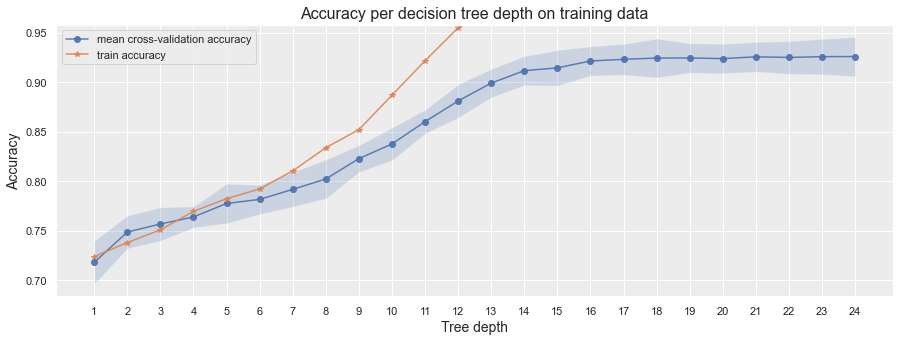

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth, n_jobs = -1)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
    def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
        fig, ax = plt.subplots(1,1, figsize=(15,5))
        ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
        ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
        ylim = plt.ylim()
        ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('Tree depth', fontsize=14)
        ax.set_ylabel('Accuracy', fontsize=14)
        ax.set_ylim(ylim)
        ax.set_xticks(depths)
        ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [182]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth, n_jobs = -1).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  23
Accuracy, Training Set:  100.0 %
Accuracy, Test Set:  94.39096 %
0.9439095856006697
[[2182  213]
 [  55 2328]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2395
           1       0.92      0.98      0.95      2383

    accuracy                           0.94      4778
   macro avg       0.95      0.94      0.94      4778
weighted avg       0.95      0.94      0.94      4778



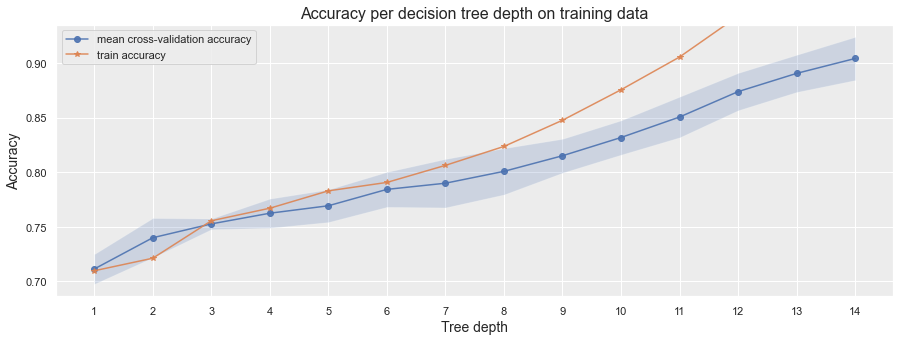

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=depth, n_jobs = -1)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
    def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
        fig, ax = plt.subplots(1,1, figsize=(15,5))
        ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
        ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
        ylim = plt.ylim()
        ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('Tree depth', fontsize=14)
        ax.set_ylabel('Accuracy', fontsize=14)
        ax.set_ylim(ylim)
        ax.set_xticks(depths)
        ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [188]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-14 tree achieves the best mean cross-validation accuracy 90.40178 +/- 0.98889% on training dataset


In [189]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=depth, n_jobs = -1).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  14
Accuracy, Training Set:  98.39433 %
Accuracy, Test Set:  92.4864 %
0.9248639598158225
[[2126  269]
 [  90 2293]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2395
           1       0.90      0.96      0.93      2383

    accuracy                           0.92      4778
   macro avg       0.93      0.92      0.92      4778
weighted avg       0.93      0.92      0.92      4778



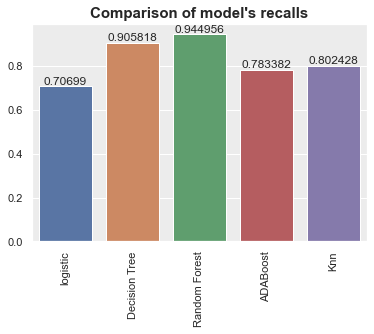

In [243]:
dict = {'logistic' :accuracy_models[0], 'Decision Tree':accuracy_models[1],'Random Forest':accuracy_models[2],'ADABoost':accuracy_models[3],'Knn':accuracy_models[4]}
ax = sns.barplot(x = list(dict.keys()), y = list(dict.values()))
ax.bar_label(ax.containers[0])
plt.title(label = "Comparison of model's accuracy", fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 90)
plt.show()

In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
param_grid = { 'C':[0.1,1],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3],'gamma': [1, 0.01]}
grid = GridSearchCV(model,param_grid,scoring = 'accuracy',cv=2,return_train_score=True, n_jobs = -1)
grid.fit(X_train,y_train)

KeyboardInterrupt: 

<h3>Observations:</h3>
1. I would go with Random Forest which has an training accuracy of 98% and test accuracy of 94%. With max depth of 14 tress and impurity as entropy.
<br></br>
2. As the max_depth count increases past 14 the model shows signs of overfitting. The model is able to learn all the features at a depth of 24 suggesting High Bias and Low Varience.
<br></br>
3. 14 is the depth where the model started showing signs of accuracy improvement.
<br></br>
4. The recall for the rf model is 98% approx. Our business problem needs to have a high recall. Hence choosing rf with hyperparameter tuning is a good option.
<br></br>
5.Default parameters worked well in my case show no sign of over and underfitting. Additionally, the recall scores were impressive to consider random forest as a good viable option.